In [2]:
library(tidyverse)
library(datasets)
library(stringr)
library(ggplot2)
library(scales)
library(sf)
library(geojsonio)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Linking to GEOS 3.7.1, GDAL 2.2.3, PROJ 4.9.3

Attaching package: ‘geojsonio’

The following object is masked from ‘package:base’:

    pretty



Reading layer `our_geojson_modified' from data source `/home/franklu/MDS/DSCI-532-Group108-R/data/our_geojson_modified.geojson' using driver `GeoJSON'
Simple feature collection with 22 features and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -123.2248 ymin: 49.19972 xmax: -123.0233 ymax: 49.29533
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)
Warning message:
“Column `NEIGHBOURHOOD` joining factor and character vector, coercing into character vector”

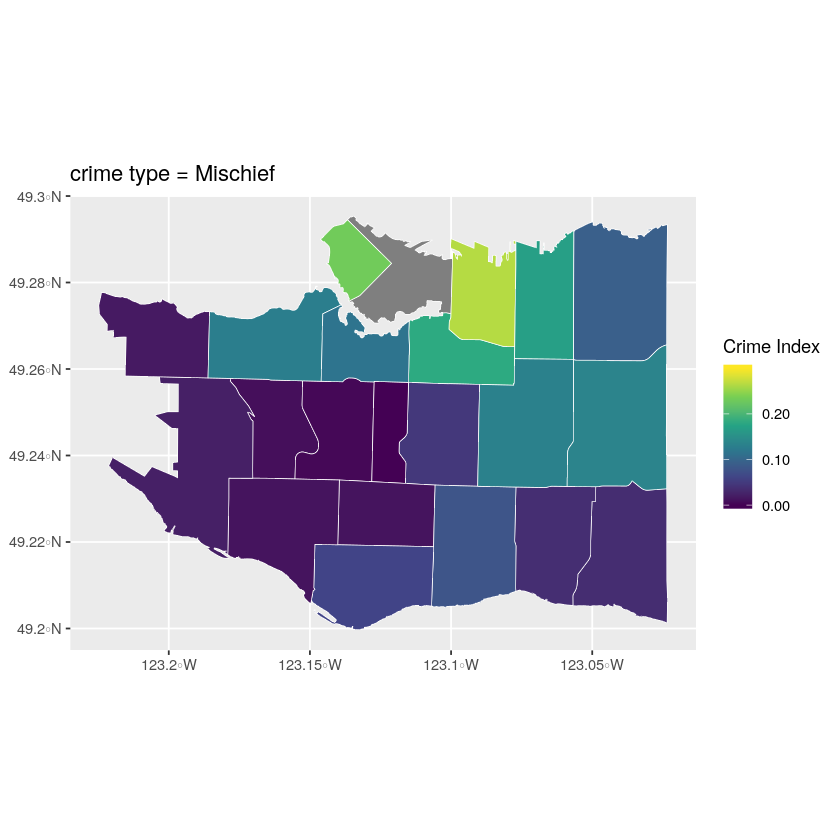

In [11]:
vancouver <- sf::st_read('../data/our_geojson_modified.geojson')
crime <- read_csv("../data/crimedata_csv_all_years_modified.csv")
crime$HUNDRED_BLOCK <- NULL
crime$X <- NULL
crime$Y <- NULL

crime <- crime %>% 
    group_by(NEIGHBOURHOOD, TYPE, YEAR) %>%
    summarise(COUNT = n())

plot_choropleth <- function(year_init = 2010, year_end = 2018, crime_type = 'all', crime_threshold = 1) {
    crime_cnt <- crime %>% 
        filter(YEAR >= year_init & YEAR <= year_end)
    
    if(crime_type != 'all') {
        crime_cnt <- crime_cnt %>%
            filter(TYPE == crime_type)
    }
    crime_cnt <- crime_cnt %>% 
        group_by(NEIGHBOURHOOD) %>%
        summarise(sum = sum(COUNT)) %>%
        mutate(min_max = (sum - min(sum)) / (max(sum) - min(sum)))
    
    full_dt <- full_join(vancouver, crime_cnt, by = c('NEIGHBOURHOOD', 'NEIGHBOURHOOD'))
    full_dt %>%
        ggplot(mapping = aes(fill = .data[['min_max']])) +
        geom_sf(color = 'white', size = 0.2) +
        scale_fill_viridis_c(option = 'viridis', 
                             name = "Crime Index", 
                             labels = comma, 
                             limits = c(0, crime_threshold)) +
        labs(title = paste("crime type =", crime_type))
}

types <- unique(crime$TYPE)
plot_choropleth(year_init = 2016, crime_type = types[3], crime_threshold = 0.3)

Reading layer `our_geojson_modified' from data source `/home/franklu/MDS/DSCI-532-Group108-R/data/our_geojson_modified.geojson' using driver `GeoJSON'
Simple feature collection with 22 features and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -123.2248 ymin: 49.19972 xmax: -123.0233 ymax: 49.29533
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)
Warning message:
“Column `NEIGHBOURHOOD` joining factor and character vector, coercing into character vector”

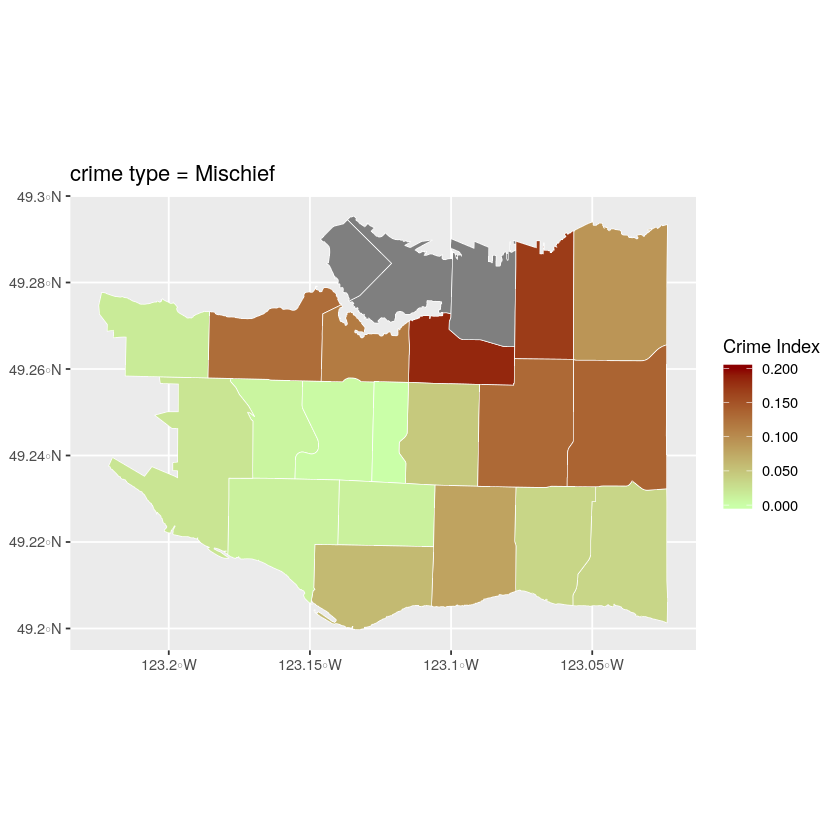

In [12]:
vancouver <- sf::st_read('../data/our_geojson_modified.geojson')
crime <- read_csv("../data/crimedata_csv_all_years_modified.csv")
crime$HUNDRED_BLOCK <- NULL
crime$X <- NULL
crime$Y <- NULL

crime <- crime %>% 
    group_by(NEIGHBOURHOOD, TYPE, YEAR) %>%
    summarise(COUNT = n())

plot_choropleth <- function(year_init = 2010, year_end = 2018, crime_type = 'all', crime_threshold = 1) {
    crime_cnt <- crime %>% 
        filter(YEAR >= year_init & YEAR <= year_end)
    
    if(crime_type != 'all') {
        crime_cnt <- crime_cnt %>%
            filter(TYPE == crime_type)
    }
    crime_cnt <- crime_cnt %>% 
        group_by(NEIGHBOURHOOD) %>%
        summarise(sum = sum(COUNT)) %>%
        mutate(min_max = (sum - min(sum)) / (max(sum) - min(sum)))
    
    full_dt <- full_join(vancouver, crime_cnt, by = c('NEIGHBOURHOOD', 'NEIGHBOURHOOD'))
    full_dt %>%
        ggplot(mapping = aes(fill = .data[['min_max']])) +
        geom_sf(color = 'white', size = 0.2) +
        scale_fill_gradient(low = '#CAFFA8',
#                             mid = '#DF3F12',
#                               high = '#000000',
                            high = '#8B0000', 
                             name = "Crime Index", 
                             labels = comma, 
                             limits = c(0, crime_threshold)) +
        labs(title = paste("crime type =", crime_type))
}

types <- unique(crime$TYPE)
plot_choropleth(year_init = 2016, crime_type = types[3], crime_threshold = 0.2)